<a href="https://colab.research.google.com/github/MadhavMalik/Investing-Model-Using-Moving-Average/blob/main/Investing_Model_Using_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Moving Average Investing Model

##Required Libraries

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [303]:
#Getting the data
# BIOCON.NS is an example where this model and analysis mostly fails
stock = yf.Ticker("SBIN.NS")

In [304]:
#stock.info


##Exploring the data

In [305]:

hist = stock.history(period="3y")
print(len(hist))
hist


743


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-16 00:00:00+05:30,394.295807,397.884664,383.098560,385.060486,80365431,0.0,0.0
2021-02-17 00:00:00+05:30,385.682578,397.023374,382.955040,394.056580,74161370,0.0,0.0
2021-02-18 00:00:00+05:30,406.785016,409.321165,395.922764,397.358307,67154539,0.0,0.0
2021-02-19 00:00:00+05:30,397.166903,397.166903,378.026330,382.380798,66155518,0.0,0.0
2021-02-22 00:00:00+05:30,383.385689,383.768494,369.078099,372.762665,52535049,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-12 00:00:00+05:30,726.000000,726.000000,704.500000,707.900024,22873137,0.0,0.0
2024-02-13 00:00:00+05:30,708.549988,718.000000,702.150024,713.450012,23351472,0.0,0.0
2024-02-14 00:00:00+05:30,705.549988,748.500000,705.549988,743.400024,36782182,0.0,0.0


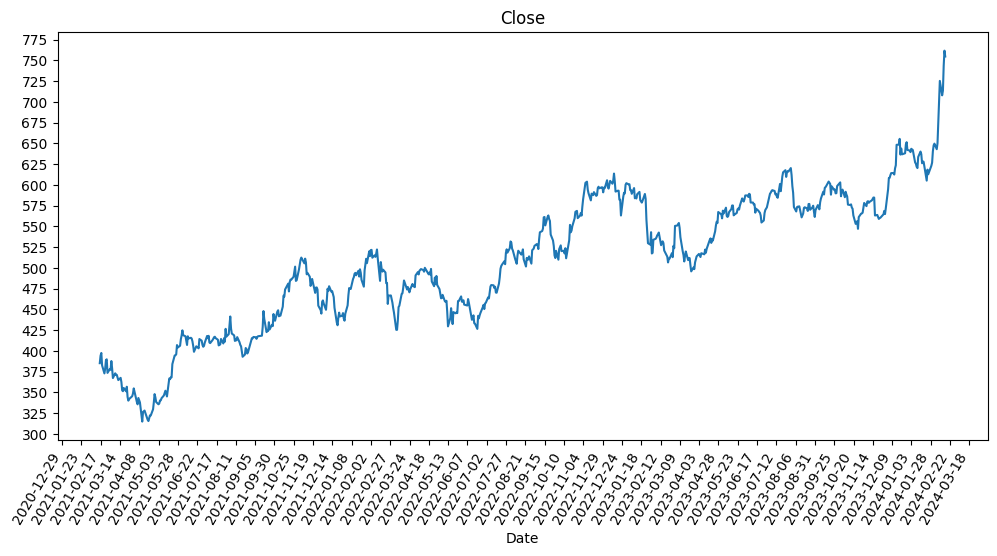

In [306]:
hist['Close'].plot(figsize=(12, 6), title='Close')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.show()

In [307]:
close_price = pd.DataFrame(hist['Close'])
close_price

,Close
Date,
2021-02-16 00:00:00+05:30,385.060486
2021-02-17 00:00:00+05:30,394.056580
2021-02-18 00:00:00+05:30,397.358307
2021-02-19 00:00:00+05:30,382.380798
2021-02-22 00:00:00+05:30,372.762665
...,...
2024-02-12 00:00:00+05:30,707.900024
2024-02-13 00:00:00+05:30,713.450012
2024-02-14 00:00:00+05:30,743.400024


## Calculating n day moving average

In [308]:
n = 200

def calculate_moving_average(df, window_size=50):
    # Calculate moving average
    moving_avg = df['Close'].rolling(window=window_size, min_periods=1).mean()

    return moving_avg


moving_avg = calculate_moving_average(hist,n)

'''
def add(lst):
    sum = 0
    for ele in lst:
        sum += ele
    return sum

n = 9

for counter in range(1,len(hist)):
    #sum.append([close_price['Date'][counter-1],add(close_price['Close'][:counter])/counter])
    if counter > n:
        close_price['Close'][counter-1] = add(close_price['Close'][counter-n:counter])/n

    else:
        close_price['Close'][counter-1] = add(close_price['Close'][:counter])/counter

'''

"\ndef add(lst):\n    sum = 0\n    for ele in lst:\n        sum += ele\n    return sum \n\nn = 9\n\nfor counter in range(1,len(hist)):\n    #sum.append([close_price['Date'][counter-1],add(close_price['Close'][:counter])/counter])\n    if counter > n:\n        close_price['Close'][counter-1] = add(close_price['Close'][counter-n:counter])/n\n\n    else:\n        close_price['Close'][counter-1] = add(close_price['Close'][:counter])/counter\n\n"

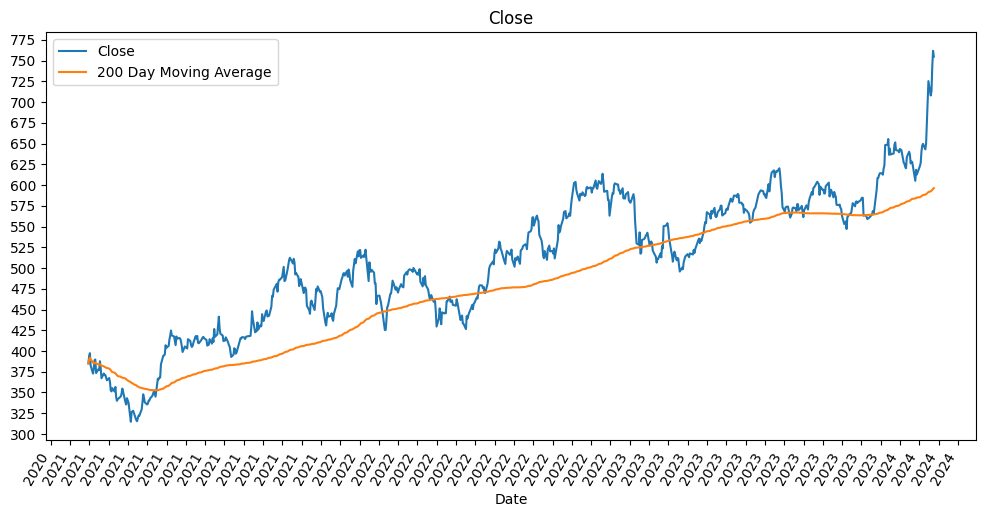

In [309]:
hist['Close'].plot(figsize=(12, 6), title='Close')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["Close", legend])
plt.show()

In [310]:
moving_avg

Date
2021-02-16 00:00:00+05:30    385.060486
2021-02-17 00:00:00+05:30    389.558533
2021-02-18 00:00:00+05:30    392.158457
2021-02-19 00:00:00+05:30    389.714043
2021-02-22 00:00:00+05:30    386.323767
                                ...    
2024-02-12 00:00:00+05:30    592.392451
2024-02-13 00:00:00+05:30    593.239561
2024-02-14 00:00:00+05:30    594.201107
2024-02-15 00:00:00+05:30    595.231836
2024-02-16 00:00:00+05:30    596.235413
Name: Close, Length: 743, dtype: float64

In [311]:
def detect_crossing_above(df):
    # Check if Close price crossed moving average from below to above
    crossed_above = (df['Close'] >= moving_avg) & (df['Close'].shift(1) < moving_avg.shift(1))
    return crossed_above

def detect_crossing_below(df):
    # Check if Close price crossed moving average from above to below
    crossed_below = (df['Close'] <= moving_avg) & (df['Close'].shift(1) > moving_avg.shift(1))
    return crossed_below


crossover_above = detect_crossing_above(hist)
crossover_below = detect_crossing_below(hist)

# Print the dates where crossover occurred
print(pd.DataFrame({'Close': hist[crossover_above]["Close"], 'Moving Average': moving_avg[crossover_above]}))
print(pd.DataFrame({'Close': hist[crossover_below]["Close"], 'Moving Average': moving_avg[crossover_below]}))


                                Close  Moving Average
Date                                                 
2021-02-24 00:00:00+05:30  388.792908      385.573186
2021-03-03 00:00:00+05:30  387.644470      383.752556
2021-05-17 00:00:00+05:30  366.637695      352.862161
2022-03-10 00:00:00+05:30  452.700684      448.490753
2022-05-30 00:00:00+05:30  465.553131      464.261750
2022-07-06 00:00:00+05:30  470.801147      469.470329
2022-07-18 00:00:00+05:30  480.953827      471.368540
2023-02-03 00:00:00+05:30  533.826416      525.320842
2023-03-03 00:00:00+05:30  550.502380      531.198157
2023-04-24 00:00:00+05:30  544.028137      542.393426
2023-06-27 00:00:00+05:30  566.099976      557.461647
2023-08-17 00:00:00+05:30  572.150024      566.688868
2023-09-01 00:00:00+05:30  569.549988      566.206215
2023-10-30 00:00:00+05:30  565.200012      564.057028
2023-11-20 00:00:00+05:30  563.750000      563.469787
2023-11-28 00:00:00+05:30  564.450012      564.316397
                            

In [312]:
hist[crossover_above]["Close"].index

DatetimeIndex(['2021-02-24 00:00:00+05:30', '2021-03-03 00:00:00+05:30',
               '2021-05-17 00:00:00+05:30', '2022-03-10 00:00:00+05:30',
               '2022-05-30 00:00:00+05:30', '2022-07-06 00:00:00+05:30',
               '2022-07-18 00:00:00+05:30', '2023-02-03 00:00:00+05:30',
               '2023-03-03 00:00:00+05:30', '2023-04-24 00:00:00+05:30',
               '2023-06-27 00:00:00+05:30', '2023-08-17 00:00:00+05:30',
               '2023-09-01 00:00:00+05:30', '2023-10-30 00:00:00+05:30',
               '2023-11-20 00:00:00+05:30', '2023-11-28 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', freq=None)

In [313]:
# We need our model to know if the stock has an upward trend overall
# otherwise, it will start investing in stocks having a downward trend, which
# will result in buying high and selling low, instead of the opposite required

# Demonstration of why the above is important


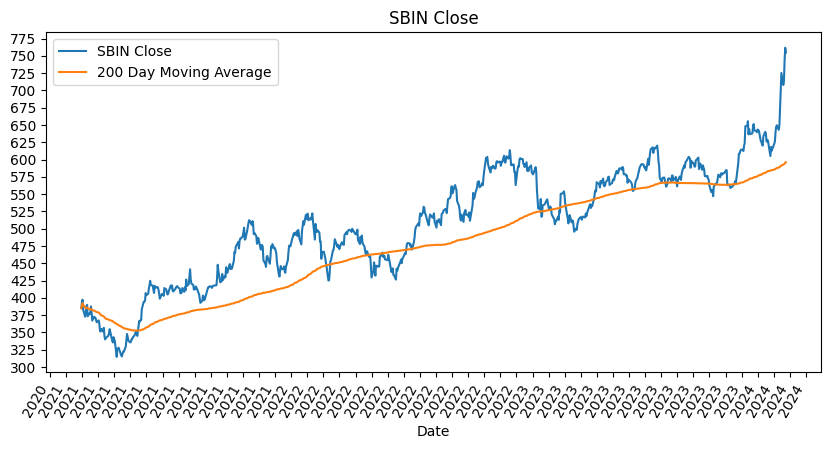

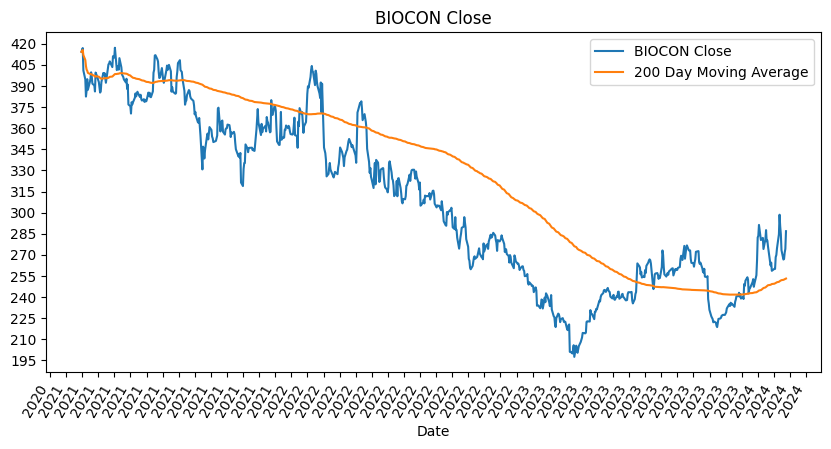

In [326]:
stocks = yf.Tickers("SBIN.NS BIOCON.NS")
hist1 = stocks.tickers["SBIN.NS"].history(period="3y")
hist2 = stocks.tickers["BIOCON.NS"].history(period="3y")
n = 200

moving_avg = calculate_moving_average(hist1,n)
hist1['Close'].plot(figsize=(10, 5), title='SBIN Close')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["SBIN Close", legend])
plt.show()
print()
moving_avg = calculate_moving_average(hist2,n)
hist2['Close'].plot(figsize=(10, 5), title='BIOCON Close')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mtick.MaxNLocator(60))
plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(20))
plt.plot(moving_avg)
legend = str(n) + " Day Moving Average"
plt.legend(["BIOCON Close", legend])
plt.show()